Correr cada linea es importante para ver la funcionalidad de los scripts.

In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,mean_absolute_error, accuracy_score, mean_squared_error, precision_score, f1_score,recall_score
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
import itertools
from sklearn.svm import SVC
from sklearn.metrics import recall_score
import re


# ANALISIS DE LOS DATOS

In [2]:
df = pd.read_parquet('data/clean_data.parquet')
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,Operating Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,...,Working Capital/Equity_Low,Working Capital/Equity_Medium,Cash Flow to Sales_High,Cash Flow to Sales_Low,Cash Flow to Liability_High,Cash Flow to Liability_Low,Cash Flow to Liability_Medium,CFO to Assets_High,CFO to Assets_Low,CFO to Assets_Medium
0,1,0.370594,0.424389,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,...,0,0,1,0,0,0,1,0,0,1
1,1,0.464291,0.538214,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,...,0,0,1,0,0,0,1,1,0,0
2,1,0.426071,0.499019,0.601450,0.998857,0.796403,0.808388,0.302035,0.780284,2.361297e-04,...,0,0,1,0,0,0,1,0,0,1
3,1,0.399844,0.451265,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,1.078888e-04,...,0,0,1,0,0,1,0,1,0,0
4,1,0.465022,0.538432,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,7.890000e+09,...,0,0,1,0,0,0,1,1,0,0


In [3]:
df.columns = df.columns.str.lstrip()

In [4]:
df.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', name).lower() for name in df.columns]
df.head()

,bankrupt?,r_o_a(_c) before interest and depreciation before interest,r_o_a(_a) before interest and % after tax,operating _gross _margin,operating _profit _rate,pre-tax net _interest _rate,after-tax net _interest _rate,non-industry income and expenditure/revenue,continuous interest rate (after tax),operating _expense _rate,...,working _capital/_equity__low,working _capital/_equity__medium,cash _flow to _sales__high,cash _flow to _sales__low,cash _flow to _liability__high,cash _flow to _liability__low,cash _flow to _liability__medium,c_f_o to _assets__high,c_f_o to _assets__low,c_f_o to _assets__medium
0,1,0.370594,0.424389,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,...,0,0,1,0,0,0,1,0,0,1
1,1,0.464291,0.538214,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,...,0,0,1,0,0,0,1,1,0,0
2,1,0.426071,0.499019,0.601450,0.998857,0.796403,0.808388,0.302035,0.780284,2.361297e-04,...,0,0,1,0,0,0,1,0,0,1
3,1,0.399844,0.451265,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,1.078888e-04,...,0,0,1,0,0,1,0,1,0,0
4,1,0.465022,0.538432,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,7.890000e+09,...,0,0,1,0,0,0,1,1,0,0


Dimensiones del dataset:

In [5]:
df.shape

(6819, 115)

In [6]:
df.columns

Index(['bankrupt?',
       'r_o_a(_c) before interest and depreciation before interest',
       'r_o_a(_a) before interest and % after tax', 'operating _gross _margin',
       'operating _profit _rate', 'pre-tax net _interest _rate',
       'after-tax net _interest _rate',
       'non-industry income and expenditure/revenue',
       'continuous interest rate (after tax)', 'operating _expense _rate',
       ...
       'working _capital/_equity__low', 'working _capital/_equity__medium',
       'cash _flow to _sales__high', 'cash _flow to _sales__low',
       'cash _flow to _liability__high', 'cash _flow to _liability__low',
       'cash _flow to _liability__medium', 'c_f_o to _assets__high',
       'c_f_o to _assets__low', 'c_f_o to _assets__medium'],
      dtype='object', length=115)

Ver si hay nulos:

Distribución de las clases:

0    6599
1     220
Name: bankrupt?, dtype: int64


<AxesSubplot:xlabel='bankrupt?', ylabel='count'>

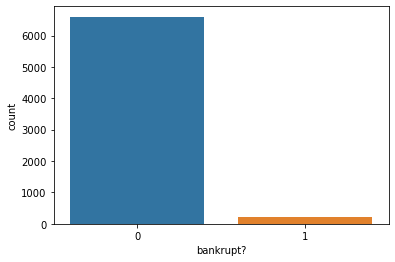

In [7]:
print(df['bankrupt?'].value_counts())
sns.countplot(x=df['bankrupt?'])

Separacion de X y Y:

In [8]:
X = df.drop('bankrupt?', axis=1).values
Y = df['bankrupt?'].values
print (X.shape , Y.shape)
#1

(6819, 114) (6819,)


In [9]:
Y

array([1, 1, 1, ..., 0, 0, 0])

In [10]:
X

array([[0.37059426, 0.42438945, 0.60145721, ..., 0.        , 0.        ,
        1.        ],
       [0.46429094, 0.53821413, 0.61023509, ..., 1.        , 0.        ,
        0.        ],
       [0.42607127, 0.49901875, 0.60145001, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.47272461, 0.533744  , 0.61044408, ..., 1.        , 0.        ,
        0.        ],
       [0.50626432, 0.5599106 , 0.60784964, ..., 1.        , 0.        ,
        0.        ],
       [0.49305319, 0.57010467, 0.62740887, ..., 0.        , 0.        ,
        1.        ]])

Separacion de test y train: (Para probar codigos y disminuir tiempo de ejecucion)





In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,stratify=Y,test_size=0.30)
print(X_train.shape)
print(X_test.shape)

(4773, 114)
(2046, 114)


Funcion para graficar matriz de confusion:



In [12]:
  #NORMALIZAR
def calcularMatrizCF(matrix,titulo):
    a = (matrix[0,0] +  matrix[0,1])
    b = (matrix[1,0] +  matrix[1,1])
    matrix[0,0] =  matrix[0,0] / a
    matrix[0,1] =  matrix[0,1] / a
    matrix[1,0] =  matrix[1,0] / b
    matrix[1,1] =  matrix[1,1] / b
    #MATRIZ DE CONFUSION
    sns.heatmap(matrix,annot=True)
    plt.xlabel('Label Pred')
    plt.ylabel('Label True')
    plt.title(titulo)
    print(matrix)

In [13]:
def gradient_boosting_tree(X,y,num_trees):
    
    skf = StratifiedKFold(n_splits=4)
    
    resultados = pd.DataFrame()
    conf_matrix_list_of_arrays = np.zeros(2)
    
    idx = 0
    
    for trees in num_trees:
        EficienciaTrain = []
        EficienciaVal = []
        accuracy = []
        Macc = []
        Mpre = []
        Mrec = []
        Mf1 = []
        print(f"Training with {trees} trees...")
        for train_index, test_index in skf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            model = GradientBoostingClassifier(n_estimators=trees)
            model.fit(X_train,y_train)

            y_pred = model.predict(X_test)
            y_pred_train = model.predict(X_train)

            conf_matrix = confusion_matrix(y_test,y_pred)
            conf_matrix_list_of_arrays = conf_matrix_list_of_arrays + conf_matrix

            EficienciaTrain.append(np.mean(y_pred_train.ravel() == y_train.ravel()))
            EficienciaVal.append(np.mean(y_pred.ravel() == y_test.ravel()))
            accuracy.append(model.score(X_test, y_test))
            Macc.append(accuracy_score(y_test, y_pred))
            Mpre.append(precision_score(y_test, y_pred))
            Mrec.append(recall_score(y_test, y_pred))
            Mf1.append(f1_score(y_test, y_pred,average="weighted"))

        resultados.loc[idx,'número de arboles'] = trees
        resultados.loc[idx,'eficiencia de entrenamiento'] = np.mean(EficienciaTrain)
        resultados.loc[idx,'desviacion estandar entrenamiento'] = np.std(EficienciaTrain)
        resultados.loc[idx,'eficiencia de prueba'] = np.mean(EficienciaVal)
        resultados.loc[idx,'Intervalo de confianza (prueba)'] = np.std(EficienciaVal)
        resultados.loc[idx,'accuracy real'] = np.mean(Macc)
        resultados.loc[idx,'precision_score'] = np.mean(Mpre)
        resultados.loc[idx,'recall_score'] = np.mean(Mrec)
        resultados.loc[idx,'f1_score'] = np.mean(Mf1)
        idx= idx +1

    return (resultados, conf_matrix_list_of_arrays)

    

In [14]:
resultados_gbt, matrix_gbt = gradient_boosting_tree(X_train,y_train,[20,50,100,200,300])

Training with 20 trees...
Training with 50 trees...
Training with 100 trees...
Training with 200 trees...
Training with 300 trees...


In [15]:
resultados_gbt

,número de arboles,eficiencia de entrenamiento,desviacion estandar entrenamiento,eficiencia de prueba,Intervalo de confianza (prueba),accuracy real,precision_score,recall_score,f1_score
0,20.0,0.982122,0.000861,0.966478,0.001568,0.966478,0.449747,0.155702,0.958502
1,50.0,0.990432,0.000913,0.965850,0.003618,0.965850,0.445779,0.227733,0.960412
2,100.0,0.996368,0.000861,0.965850,0.003618,0.965850,0.455706,0.240553,0.960903
3,200.0,0.999860,0.000140,0.965221,0.001916,0.965221,0.427191,0.227564,0.960034
4,300.0,1.000000,0.000000,0.965221,0.001250,0.965221,0.426136,0.227395,0.960010


[[0.99073393 0.00926607]
 [0.78441558 0.21558442]]


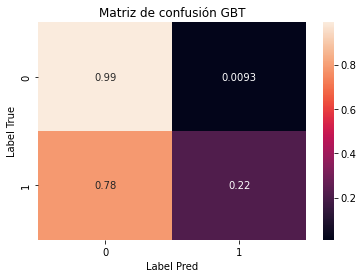

In [16]:
calcularMatrizCF(matrix_gbt, "Matriz de confusión GBT")

# SVM (Support Vector Machine)

In [17]:
#ejercicio de código
def support_vector_machine(x, y, kernels, gammas,params_reg):
    
    idx = 0
    
    kf = StratifiedKFold(n_splits=4)
    
    # crear una lista con la combinaciones de los elementos de cada list
    kernels_gammas_regs = list(itertools.product(kernels, gammas, params_reg))
    
    resultados = pd.DataFrame()
    conf_matrix_list_of_arrays = np.zeros(2)
    
    for params in kernels_gammas_regs:
        kernel, gamma, param_reg = params
        ''' print("parametros usados", params) # puede usar para ver los params '''
        errores_train = []
        errores_test = []
        EficienciaVal = []
        pct_support_vectors = []
        Macc = []
        Mpre = []
        Mrec = []
        Mf1 = []
        print(f"Running with Kernel: {kernel}, Gamma: {gamma}, C: {param_reg} parameters...")
        for train_index, test_index in kf.split(x,y):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]  
   
            svm = SVC(kernel=kernel, gamma=gamma, C= param_reg)
            # Entrenar el modelo
            svm.fit(X=X_train, y=y_train)
            # calculo de errores
            
            y_train_pred = svm.predict(X=X_train)
            y_test_pred = svm.predict(X=X_test)
            
            conf_matrix = confusion_matrix(y_test, svm.predict(X_test))
            conf_matrix_list_of_arrays = conf_matrix_list_of_arrays + conf_matrix
            
            # error y pct de vectores de soporte
            errores_train.append(accuracy_score(y_true = y_train, y_pred = y_train_pred))
            errores_test.append(accuracy_score(y_true = y_test, y_pred = y_test_pred))
            
            # contar muestras de entrenamiento
            n_train = X_train.shape[0]
            pct_vs = ( svm.support_vectors_.shape[0] /n_train)
            pct_support_vectors.append(pct_vs)
            
            Macc.append(accuracy_score(y_test, y_test_pred))
            Mpre.append(precision_score(y_test, y_test_pred))
            Mrec.append(recall_score(y_test, y_test_pred))
            Mf1.append(f1_score(y_test, y_test_pred,average="weighted",labels=np.unique(y_test_pred)))
            EficienciaVal.append(np.mean(y_test_pred.ravel() == y_test.ravel()))

    
        resultados.loc[idx,'kernel'] = kernel
        resultados.loc[idx,'gamma'] = gamma
        resultados.loc[idx,'param_reg'] = param_reg
        resultados.loc[idx,'error de entrenamiento'] = np.mean(errores_train)
        resultados.loc[idx,'error de prueba'] = np.mean(errores_test)
        resultados.loc[idx,'% de vectores de soporte'] = np.mean(pct_support_vectors)*100
        resultados.loc[idx,'accuracy real'] = np.mean(Macc)
        resultados.loc[idx,'Intervalo de confianza (prueba)'] = np.std(EficienciaVal)
        resultados.loc[idx,'precision_score'] = np.mean(Mpre)
        resultados.loc[idx,'recall_score'] = np.mean(Mrec)
        resultados.loc[idx,'f1_score'] = np.mean(Mf1)

        idx+=1
    return (resultados, conf_matrix_list_of_arrays)

Mejor resultado SVM

In [18]:
# vamos a realizar los experimentos
resultados_svm, matrix_svm  = support_vector_machine(x = X,y=Y,
                                 kernels=['rbf'],
                                 gammas = [0.01],
                                 params_reg = [0.01]
                                )
resultados_svm

Running with Kernel: rbf, Gamma: 0.01, C: 0.01 parameters...


,kernel,gamma,param_reg,error de entrenamiento,error de prueba,% de vectores de soporte,accuracy real,Intervalo de confianza (prueba),precision_score,recall_score,f1_score
0,rbf,0.01,0.01,0.967737,0.967737,54.846752,0.967737,0.000008,0.0,0.0,0.983604


In [19]:
matrix_svm

array([[6599.,    0.],
       [ 220.,    0.]])

Matriz de confusión SVM

[[1. 0.]
 [1. 0.]]


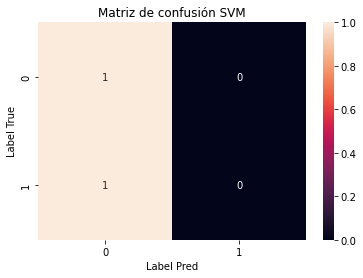

In [20]:
calcularMatrizCF(matrix_svm, "Matriz de confusión SVM")

# RF (Random Forest)


In [21]:
#ejercicio de código
def random_forest(num_trees,numero_de_variables, X, Y):
    folds = 4
    skf = StratifiedKFold(n_splits=folds)
    resultados = pd.DataFrame()
    idx = 0
    conf_matrix_list_of_arrays = np.zeros(2)
    
    for trees in num_trees:
        
        for num_variables in numero_de_variables:
            ## para almacenar los errores intermedios
            EficienciaTrain = []
            EficienciaVal = []
            Macc = []
            Mpre = []
            Mrec = []
            Mf1 = []
            for train, test in skf.split(X, Y):
                Xtrain = X[train,:]
                Ytrain = Y[train]
                Xtest = X[test,:]
                Ytest = Y[test]
                #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
                modelo = RandomForestClassifier(n_estimators=trees, max_features=num_variables, criterion="gini")
                modelo.fit(Xtrain,Ytrain)
                #predecir muestras de entrenamiento
                Ytrain_pred = modelo.predict(Xtrain)
                #predecir muestras de pruebas
                Yest = modelo.predict(Xtest)
                #Evaluamos las predicciones del modelo con los datos de test
                EficienciaTrain.append(np.mean(Ytrain_pred.ravel() == Ytrain.ravel()))
                EficienciaVal.append(np.mean(Yest.ravel() == Ytest.ravel()))
                conf_matrix = confusion_matrix(Ytest, modelo.predict(Xtest))
                conf_matrix_list_of_arrays = conf_matrix_list_of_arrays + conf_matrix
                Macc.append(accuracy_score(Ytest, Yest))
                Mpre.append(precision_score(Ytest, Yest))
                Mrec.append(recall_score(Ytest, Yest))
                Mf1.append(f1_score(Ytest, Yest))



            resultados.loc[idx,'número de arboles'] = trees
            resultados.loc[idx,'variables para la selección del mejor umbral'] = num_variables
            resultados.loc[idx,'eficiencia de entrenamiento'] = np.mean(EficienciaTrain)
            resultados.loc[idx,'desviacion estandar entrenamiento'] = np.std(EficienciaTrain)
            resultados.loc[idx,'eficiencia de prueba'] = np.mean(EficienciaVal)
            resultados.loc[idx,'Intervalo de confianza (prueba)'] = np.std(EficienciaVal)
            resultados.loc[idx,'accuracy real'] = np.mean(Macc)
            resultados.loc[idx,'precision_score'] = np.mean(Mpre)
            resultados.loc[idx,'recall_score'] = np.mean(Mrec)
            resultados.loc[idx,'f1_score'] = np.mean(Mf1)
            idx= idx +1
        print(f"Termina para {trees} arboles")
        
    return (resultados, conf_matrix_list_of_arrays)

Resultados Random Forest

In [22]:
arboles = [5,10,20,50,100, 150]
variables_seleccion = [5,10,15,20,25]
resultados_rf, matrixRF= random_forest(arboles, variables_seleccion, X, Y)
resultados_rf

Termina para 5 arboles
Termina para 10 arboles
Termina para 20 arboles
Termina para 50 arboles
Termina para 100 arboles
Termina para 150 arboles


,número de arboles,variables para la selección del mejor umbral,eficiencia de entrenamiento,desviacion estandar entrenamiento,eficiencia de prueba,Intervalo de confianza (prueba),accuracy real,precision_score,recall_score,f1_score
0,5.0,5.0,0.995943,0.000487,0.954834,0.017459,0.954834,0.361304,0.181818,0.217020
1,5.0,10.0,0.995552,0.000576,0.952928,0.019277,0.952928,0.336418,0.154545,0.190198
2,5.0,15.0,0.995405,0.000324,0.953074,0.020989,0.953074,0.350198,0.236364,0.262481
3,5.0,20.0,0.995796,0.000751,0.958794,0.015632,0.958794,0.466320,0.277273,0.317822
4,5.0,25.0,0.995992,0.000788,0.951755,0.023790,0.951755,0.376125,0.195455,0.225425
5,10.0,5.0,0.996432,0.000683,0.963192,0.008847,0.963192,0.452890,0.140909,0.196942
6,10.0,10.0,0.996432,0.000289,0.955861,0.019291,0.955861,0.478898,0.109091,0.136375
7,10.0,15.0,0.996529,0.000506,0.955714,0.024242,0.955714,0.507653,0.154545,0.217317
8,10.0,20.0,0.996187,0.000982,0.959673,0.017074,0.959673,0.482802,0.190909,0.252110
9,10.0,25.0,0.995943,0.000749,0.954834,0.020233,0.954834,0.459276,0.109091,0.137306


Mejor resultado Random Forest

Matriz de confusión Random Forest

[[0.9842956  0.0157044 ]
 [0.84954545 0.15045455]]


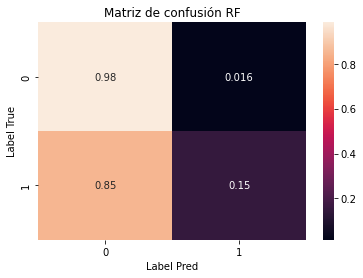

In [23]:
calcularMatrizCF(matrixRF, "Matriz de confusión RF")